# SUBMISSION BY :- VINAY KUMAR KUSHWAHA
## Lets Grow More :- Virtual Internship Programe (LGM-VIP)
## BATCH:- MAY'22
## TASK 3 :- Develop A Neural Network That Can Read Handwriting

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN.

### Importing the required libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
# has a particular focus on training and inference of deep neural networks
from tensorflow import keras
# open source Python library for developing and evaluating deep learning models
from tensorflow.keras import datasets


### Importing the dataset from MNIST database

In [3]:
from tensorflow.keras.datasets import mnist
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

11490434/11490434 [==============================] - 3s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [30]:
#For finding row and columns of train_x
trainX.shape

(60000, 28, 28)

In [32]:
#For finding row and columns of test_x
testX.shape


(10000, 28, 28)

### Showing dataset images with normalized pixel

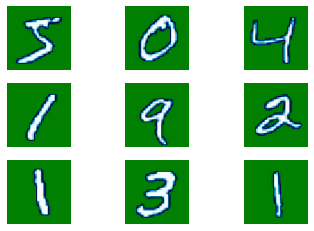

In [167]:
#for trainX
for i in range (9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap ='ocean', vmax=255)
    plt.axis(False)
    

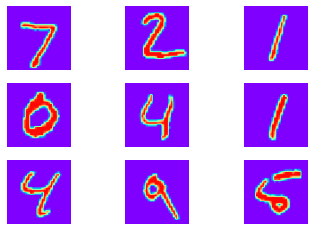

In [169]:
#For testX
for i in range (9):
    plt.subplot(330 + 1 + i)
    plt.imshow(testX[i], cmap ='rainbow', vmax=255)
    plt.axis(False)

### Reshaping the dataset

In [39]:
train_x = trainX.reshape(60000,28,28,1)
test_x = testX.reshape(10000,28,28,1)

# Making the model: CNN Model

In [71]:
#Imposing the neural network
cnn_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [72]:
#using adam optimizer..
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [73]:
#checking the test_x & test_y dataset
cnn_model.evaluate(test_x,testy)

313/313 [==============================] - 0s 720us/step - loss: 159.7036 - accuracy: 0.1098


[159.7035675048828, 0.10980000346899033]

### Fitting the model

In [140]:
#fitting the model..
f= cnn_model.fit(train_x,trainy, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.1708 - accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.1713 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.1579 - accuracy: 0.9617
Epoch 4/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.1642 - accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.1588 - accuracy: 0.9625
Epoch 6/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.1550 - accuracy: 0.9636
Epoch 7/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.1488 - accuracy: 0.9650
Epoch 8/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.1505 - accuracy: 0.9639
Epoch 9/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.1416 - accuracy: 0.9654
Epoch 10/10
1875/1875 [==============================] - 2s 972u

### Summary of the CNN model

In [141]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Prediction of the model...

In [77]:
predicted_y=[]
prediction =model.predict(test_x)
for element in prediction:
    predicted_y.append(np.argmax(element))

313/313 [==============================] - 0s 601us/step


In [116]:
predicted_y = np.array(predicted_y)
predicted_y

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Showing dataset image with testing set..

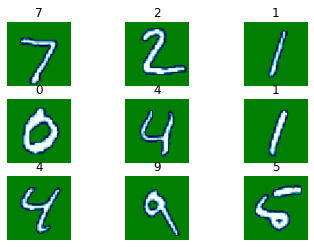

In [124]:
for i in range(0,9):
    
    plt.subplot(330+1+i)
    plt.imshow(test_x[i],cmap = 'ocean')
    plt.xlabel(predicted_y[i])
    plt.axis(False)
    plt.title(testy[i], fontsize=12)

In [113]:
actual = testy
prediction =predicted_y
Final_result=pd.DataFrame({'Actual' :actual,'Predicted':prediction})
Final_result.head(9)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5


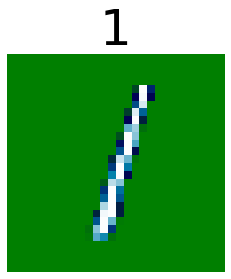

In [160]:
plt.imshow(test_x[2], cmap= 'ocean', vmax=255)
plt.axis(False)
plt.title(testy[2], fontsize=50)
plt.show()

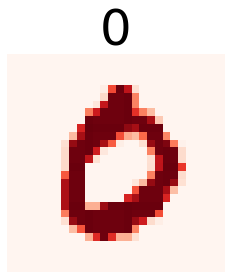

In [161]:
plt.imshow(test_x[3], cmap= 'Reds', vmax=255)
plt.axis(False)
plt.title(testy[3], fontsize=50)
plt.show()

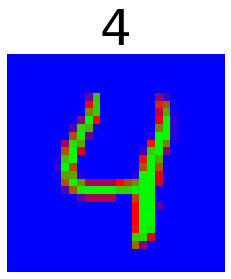

In [162]:
plt.imshow(test_x[4], cmap= 'brg', vmax=255)
plt.axis(False)
plt.title(testy[4], fontsize=50)
plt.show()

In [139]:
prediction=model.predict(test_x)
print(np.argmax(prediction[2]))
print(np.argmax(prediction[3]))
print(np.argmax(prediction[4]))

313/313 [==============================] - 0s 607us/step
1
0
4


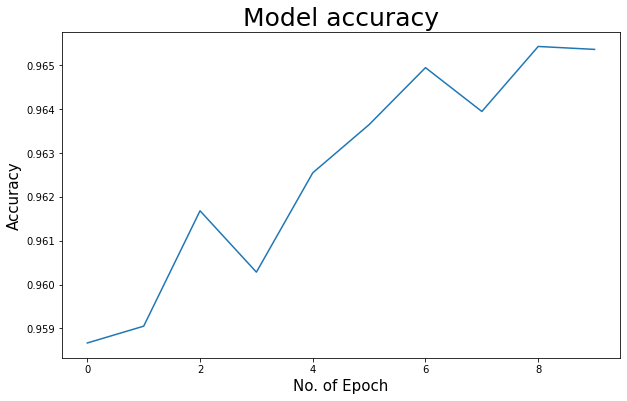

In [152]:
#Checking accuracy..
plt.figure(figsize=(10,6))
check_accuracy =pd.DataFrame(f.history)
check_accuracy['accuracy'].plot()
plt.title('Model accuracy',fontsize=25)
plt.xlabel('No. of Epoch',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)

plt.show()

# Model evaluation:

In [163]:
model_evaluation =model.evaluate(test_x,testy)
model_evaluation

313/313 [==============================] - 0s 760us/step - loss: 0.2827 - accuracy: 0.9509


[0.2826725244522095, 0.9509000182151794]

# CONCLUSION:-

## By using this model, we are getting 95.09% of accuracy from the given MNIST dataset of neural network that can read handwriting...